In [470]:
 %matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [224]:
df = pd.read_csv("Trips_activity.csv")

In [225]:
df

,id_week,id_driver,id_unit,trip_status,trip_rev,trip_distance,time_on_trip,mean_speed,id_shift,request_datetime,drop_datetime,trips_per_hour,shift_time,rest_days,shift_str_datetime
0,49,6,53,completed,70.35,9.36,43.116667,16.873310,457.0,25/08/2022 14:19,25/08/2022 15:02,1.802704,De 09:00 a 18:30,Lu - Ma,25/08/2022 09:00
1,49,6,19,completed,80.97,4.88,18.950000,18.205181,459.0,27/08/2022 16:09,27/08/2022 16:28,3.464870,De 09:00 a 18:30,Lu - Ma,27/08/2022 09:00
2,49,6,53,rider_cancelled,38.11,0.00,NaN,NaN,NaN,25/08/2022 13:08,NaT,NaN,De 09:00 a 18:30,Lu - Ma,NaT
3,49,6,19,completed,99.43,10.14,40.550000,16.216793,459.0,27/08/2022 10:27,27/08/2022 11:08,1.599289,De 09:00 a 18:30,Lu - Ma,27/08/2022 09:00
4,49,6,19,completed,640.89,27.97,111.433333,15.060125,456.0,24/08/2022 09:50,24/08/2022 11:42,0.314465,De 09:00 a 18:30,Lu - Ma,24/08/2022 09:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21481,49,980,110,completed,51.26,6.39,24.616667,17.309256,35388.0,27/08/2022 17:08,27/08/2022 17:33,2.708804,NaN,NaN,NaT
21482,49,980,110,completed,122.71,3.27,43.050000,4.561023,35387.0,26/08/2022 17:53,26/08/2022 18:36,1.394808,NaN,NaN,NaT
21483,49,980,110,completed,104.91,8.38,47.483333,13.700273,35388.0,27/08/2022 21:19,27/08/2022 22:07,0.751095,NaN,NaN,NaT
21484,49,980,110,completed,127.55,12.15,55.516667,13.131191,35387.0,26/08/2022 16:28,26/08/2022 17:23,1.080757,NaN,NaN,NaT


In [226]:
df.describe()

,id_week,id_driver,id_unit,trip_rev,trip_distance,time_on_trip,mean_speed,id_shift,trips_per_hour
count,21486.0,21486.000000,21486.000000,18889.000000,21486.000000,18283.000000,18259.000000,18259.000000,16712.000000
mean,49.0,656.833845,106.434609,98.562022,10.832123,39.091735,19.981026,28106.821567,1.864612
std,0.0,252.931233,58.763279,63.986745,9.881230,20.839683,9.192492,8576.652177,1.176876
min,49.0,6.000000,1.000000,-78.740000,0.000000,1.366667,0.000000,456.000000,0.171780
25%,49.0,506.000000,57.000000,52.590000,3.350000,24.008333,13.224229,25070.000000,1.094225
50%,49.0,720.000000,109.000000,85.390000,8.510000,35.100000,18.564461,31699.000000,1.582418
75%,49.0,862.000000,155.000000,128.480000,15.960000,49.233333,25.449924,34218.000000,2.310655
max,49.0,980.000000,211.000000,1626.290000,80.380000,207.483333,144.734695,35389.000000,43.902439


In [227]:
df.dtypes

id_week                 int64
id_driver               int64
id_unit                 int64
trip_status            object
trip_rev              float64
trip_distance         float64
time_on_trip          float64
mean_speed            float64
id_shift              float64
request_datetime       object
drop_datetime          object
trips_per_hour        float64
shift_time             object
rest_days              object
shift_str_datetime     object
dtype: object

In [228]:
df['trip_status'].unique()

array(['completed', 'rider_cancelled', 'driver_cancelled',
       'delivery_failed', 'fare_split', 'failed'], dtype=object)

In [229]:
completed_trips= df[['trip_status','drop_datetime','id_week']]
completed_trips

,trip_status,drop_datetime,id_week
0,completed,25/08/2022 15:02,49
1,completed,27/08/2022 16:28,49
2,rider_cancelled,NaT,49
3,completed,27/08/2022 11:08,49
4,completed,24/08/2022 11:42,49
...,...,...,...
21481,completed,27/08/2022 17:33,49
21482,completed,26/08/2022 18:36,49
21483,completed,27/08/2022 22:07,49
21484,completed,26/08/2022 17:23,49


In [230]:
completed_trips['DateTime'] = pd.to_datetime(completed_trips['drop_datetime'])

/var/folders/z0/ts25dzjn3bxgr3zx44lvygyr0000gn/T/ipykernel_68850/807109741.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  completed_trips['DateTime'] = pd.to_datetime(completed_trips['drop_datetime'])
/var/folders/z0/ts25dzjn3bxgr3zx44lvygyr0000gn/T/ipykernel_68850/807109741.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_trips['DateTime'] = pd.to_datetime(completed_trips['drop_datetime'])


In [231]:
completed_trips['Day_name'] = completed_trips['DateTime'].dt.day_name()  # Converts to weekday name (Monday, Tuesday, etc.)

/var/folders/z0/ts25dzjn3bxgr3zx44lvygyr0000gn/T/ipykernel_68850/575937749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_trips['Day_name'] = completed_trips['DateTime'].dt.day_name()  # Converts to weekday name (Monday, Tuesday, etc.)


In [232]:
completed_trips['Day_number'] = completed_trips['DateTime'].dt.day

/var/folders/z0/ts25dzjn3bxgr3zx44lvygyr0000gn/T/ipykernel_68850/2898034542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_trips['Day_number'] = completed_trips['DateTime'].dt.day


In [233]:
completed_trips = completed_trips.dropna(subset=['Day_number'])

In [234]:
completed_trips['Day_number'] = completed_trips['Day_number'].astype(int)

/var/folders/z0/ts25dzjn3bxgr3zx44lvygyr0000gn/T/ipykernel_68850/3464619998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_trips['Day_number'] = completed_trips['Day_number'].astype(int)


In [235]:
completed_trips['Formatted_Day'] = completed_trips['Day_number'].astype(str) + ' - ' + completed_trips['Day_name']

/var/folders/z0/ts25dzjn3bxgr3zx44lvygyr0000gn/T/ipykernel_68850/1563205806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_trips['Formatted_Day'] = completed_trips['Day_number'].astype(str) + ' - ' + completed_trips['Day_name']


In [236]:
completed_trips = completed_trips.sort_values(by='Day_number')

In [237]:
completed_trips

,trip_status,drop_datetime,id_week,DateTime,Day_name,Day_number,Formatted_Day
7051,completed,22/08/2022 23:35,49,2022-08-22 23:35:00,Monday,22,22 - Monday
6503,completed,22/08/2022 12:45,49,2022-08-22 12:45:00,Monday,22,22 - Monday
2657,completed,22/08/2022 17:28,49,2022-08-22 17:28:00,Monday,22,22 - Monday
6502,completed,22/08/2022 13:41,49,2022-08-22 13:41:00,Monday,22,22 - Monday
6501,completed,22/08/2022 13:12,49,2022-08-22 13:12:00,Monday,22,22 - Monday
...,...,...,...,...,...,...,...
8209,completed,29/08/2022 00:42,49,2022-08-29 00:42:00,Monday,29,29 - Monday
1940,completed,29/08/2022 02:58,49,2022-08-29 02:58:00,Monday,29,29 - Monday
11778,completed,29/08/2022 01:49,49,2022-08-29 01:49:00,Monday,29,29 - Monday
11801,completed,29/08/2022 02:17,49,2022-08-29 02:17:00,Monday,29,29 - Monday


In [238]:
completed_trips = completed_trips[['Formatted_Day','trip_status','id_week']]
completed_trips

,Formatted_Day,trip_status,id_week
7051,22 - Monday,completed,49
6503,22 - Monday,completed,49
2657,22 - Monday,completed,49
6502,22 - Monday,completed,49
6501,22 - Monday,completed,49
...,...,...,...
8209,29 - Monday,completed,49
1940,29 - Monday,completed,49
11778,29 - Monday,completed,49
11801,29 - Monday,completed,49


In [239]:
completed_trips= completed_trips.groupby(['Formatted_Day','trip_status'],as_index=False).count()
completed_trips

,Formatted_Day,trip_status,id_week
0,22 - Monday,completed,2121
1,22 - Monday,fare_split,1
2,23 - Tuesday,completed,2602
3,23 - Tuesday,fare_split,3
4,24 - Wednesday,completed,2661
5,24 - Wednesday,fare_split,3
6,25 - Thursday,completed,2486
7,25 - Thursday,fare_split,3
8,26 - Friday,completed,2475
9,26 - Friday,failed,1


In [240]:
completed_trips = completed_trips.pivot(index='Formatted_Day',columns='trip_status' )
completed_trips

id_week                  
trip_status    completed failed fare_split
Formatted_Day                             
22 - Monday       2121.0    NaN        1.0
23 - Tuesday      2602.0    NaN        3.0
24 - Wednesday    2661.0    NaN        3.0
25 - Thursday     2486.0    NaN        3.0
26 - Friday       2475.0    1.0        4.0
27 - Saturday     2782.0    1.0        3.0
28 - Sunday       2647.0    NaN        4.0
29 - Monday        485.0    NaN        1.0

In [241]:
revenue= df[['drop_datetime','trip_rev']]
revenue


,drop_datetime,trip_rev
0,25/08/2022 15:02,70.35
1,27/08/2022 16:28,80.97
2,NaT,38.11
3,27/08/2022 11:08,99.43
4,24/08/2022 11:42,640.89
...,...,...
21481,27/08/2022 17:33,51.26
21482,26/08/2022 18:36,122.71
21483,27/08/2022 22:07,104.91
21484,26/08/2022 17:23,127.55


In [242]:
revenue['DateTime'] = pd.to_datetime(revenue['drop_datetime'])

/var/folders/z0/ts25dzjn3bxgr3zx44lvygyr0000gn/T/ipykernel_68850/3172721825.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  revenue['DateTime'] = pd.to_datetime(revenue['drop_datetime'])
/var/folders/z0/ts25dzjn3bxgr3zx44lvygyr0000gn/T/ipykernel_68850/3172721825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue['DateTime'] = pd.to_datetime(revenue['drop_datetime'])


In [243]:
revenue['Day'] = revenue['DateTime'].dt.day_name()  # Converts to weekday name (Monday, Tuesday, etc.)
revenue['Hour'] = revenue['DateTime'].dt.hour

/var/folders/z0/ts25dzjn3bxgr3zx44lvygyr0000gn/T/ipykernel_68850/2019910647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue['Day'] = revenue['DateTime'].dt.day_name()  # Converts to weekday name (Monday, Tuesday, etc.)
/var/folders/z0/ts25dzjn3bxgr3zx44lvygyr0000gn/T/ipykernel_68850/2019910647.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue['Hour'] = revenue['DateTime'].dt.hour


In [244]:
revenue= revenue[['Day','Hour', 'trip_rev' ]]
revenue

,Day,Hour,trip_rev
0,Thursday,15.0,70.35
1,Saturday,16.0,80.97
2,NaN,NaN,38.11
3,Saturday,11.0,99.43
4,Wednesday,11.0,640.89
...,...,...,...
21481,Saturday,17.0,51.26
21482,Friday,18.0,122.71
21483,Saturday,22.0,104.91
21484,Friday,17.0,127.55


<Axes: xlabel='Day', ylabel='trip_rev'>

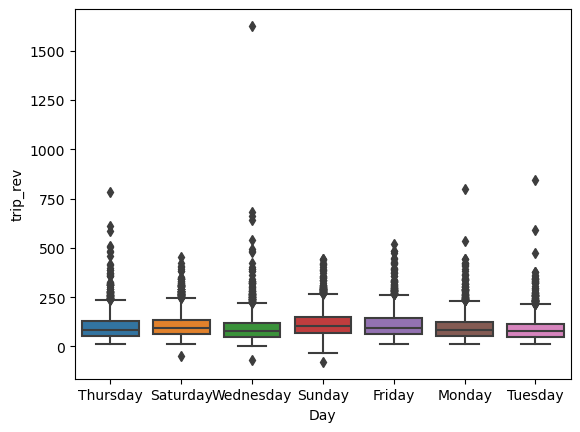

In [245]:
sns.boxplot(x='Day', y='trip_rev', data=revenue)

In [246]:
revenue_grp= revenue.groupby(['Hour'], as_index=False).sum()


In [247]:

revenue_sort= revenue_grp.sort_values(by='Hour')

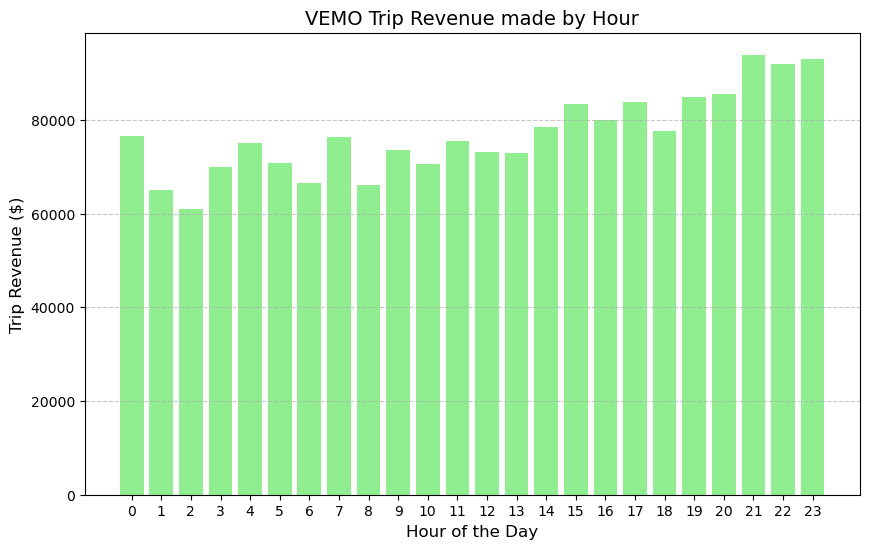

In [248]:
plt.figure(figsize=(10, 6))
plt.bar(revenue_sort['Hour'], revenue_sort['trip_rev'], color='lightgreen')

plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Trip Revenue ($)', fontsize=12)
plt.title('VEMO Trip Revenue made by Hour', fontsize=14)
plt.xticks(revenue_sort['Hour'])  
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [249]:
heatmap_revenue = revenue.pivot_table(index='Day', columns='Hour', values='trip_rev', aggfunc='sum')


In [250]:
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_revenue = heatmap_revenue.reindex(ordered_days)
heatmap_revenue

Hour,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
Day,,,,,,,,,,,,,,,,,,,,,
Monday,9725.71,6669.14,5666.67,8815.50,11094.36,9742.64,11222.24,10979.87,11073.40,10674.49,...,11792.83,11184.63,10692.78,12600.66,10580.32,10861.04,11073.94,11768.63,13250.49,12140.22
Tuesday,8907.25,7310.98,7609.34,8414.59,9815.13,9796.49,8300.52,10012.16,9297.01,10324.05,...,9467.63,9580.28,10631.94,10119.98,10105.40,11545.29,10201.83,10033.55,9509.89,10855.00
Wednesday,10369.07,7496.60,7820.59,8579.18,10622.25,10333.49,11141.98,11171.90,9365.94,10194.21,...,10374.01,11322.53,11006.94,11518.53,10552.90,11604.42,10733.76,11972.97,10977.43,11903.36
Thursday,10813.83,8899.91,7613.23,7246.53,9420.69,9539.39,6886.42,11060.88,9063.78,10688.17,...,9587.91,11848.09,11011.28,11727.57,10651.35,11058.53,12670.44,12064.55,11777.03,12786.63
Friday,12179.59,8840.59,9330.54,11652.28,10978.14,9224.69,7600.28,10575.52,8940.29,10089.89,...,11011.01,12305.73,11757.29,11574.99,13615.96,13399.21,15259.76,15686.78,13417.71,15092.80
Saturday,11009.54,11977.44,10864.89,11442.54,10592.25,11059.49,10410.42,11274.14,9383.03,10577.49,...,11618.22,13449.85,13112.95,13990.00,12206.79,13615.63,12372.61,17301.80,15601.08,15304.70
Sunday,13468.99,13870.25,12117.71,13832.19,12546.24,11145.76,11065.90,11317.22,8945.52,10950.15,...,14679.05,13765.74,11745.81,12230.43,9870.81,12758.83,13143.46,15089.13,17379.32,14959.54


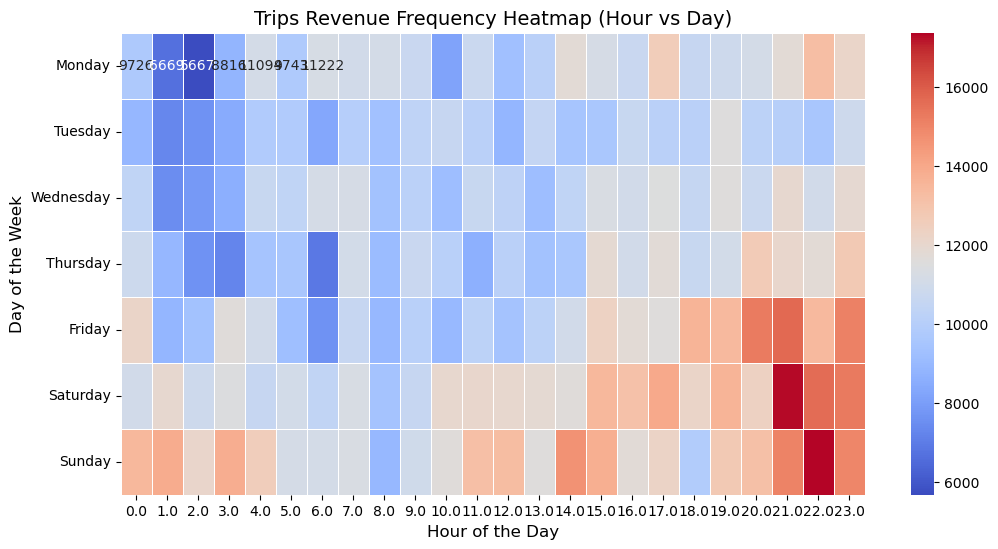

In [251]:

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_revenue, cmap='coolwarm', annot=True, fmt=".0f", linewidths=0.5)

plt.title('Trips Revenue Frequency Heatmap (Hour vs Day)', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Day of the Week', fontsize=12)

plt.show()

In [252]:
driver_id= df[['id_driver','drop_datetime','request_datetime']]
driver_id

,id_driver,drop_datetime,request_datetime
0,6,25/08/2022 15:02,25/08/2022 14:19
1,6,27/08/2022 16:28,27/08/2022 16:09
2,6,NaT,25/08/2022 13:08
3,6,27/08/2022 11:08,27/08/2022 10:27
4,6,24/08/2022 11:42,24/08/2022 09:50
...,...,...,...
21481,980,27/08/2022 17:33,27/08/2022 17:08
21482,980,26/08/2022 18:36,26/08/2022 17:53
21483,980,27/08/2022 22:07,27/08/2022 21:19
21484,980,26/08/2022 17:23,26/08/2022 16:28


In [253]:
driver_673 = driver_id.loc[driver_id['id_driver'] == 673]
print(driver_673)

      id_driver     drop_datetime  request_datetime
9000        673  22/08/2022 12:16  22/08/2022 12:07
9001        673  27/08/2022 11:20  27/08/2022 10:46
9002        673  27/08/2022 09:47  27/08/2022 09:17
9003        673               NaT  27/08/2022 09:42
9004        673  27/08/2022 11:55  27/08/2022 11:16
...         ...               ...               ...
9070        673  27/08/2022 08:45  27/08/2022 08:27
9071        673  24/08/2022 11:59  24/08/2022 11:15
9072        673  27/08/2022 08:27  27/08/2022 07:52
9073        673  24/08/2022 12:43  24/08/2022 12:11
9074        673  23/08/2022 10:58  23/08/2022 10:28

[75 rows x 3 columns]


In [254]:
driver_673= pd.DataFrame(driver_673)

In [255]:
driver_673

,id_driver,drop_datetime,request_datetime
9000,673,22/08/2022 12:16,22/08/2022 12:07
9001,673,27/08/2022 11:20,27/08/2022 10:46
9002,673,27/08/2022 09:47,27/08/2022 09:17
9003,673,NaT,27/08/2022 09:42
9004,673,27/08/2022 11:55,27/08/2022 11:16
...,...,...,...
9070,673,27/08/2022 08:45,27/08/2022 08:27
9071,673,24/08/2022 11:59,24/08/2022 11:15
9072,673,27/08/2022 08:27,27/08/2022 07:52
9073,673,24/08/2022 12:43,24/08/2022 12:11


In [256]:
driver_673['drop_datetime'] = pd.to_datetime(driver_673['drop_datetime'])
driver_673['request_datetime'] = pd.to_datetime(driver_673['request_datetime'])


/var/folders/z0/ts25dzjn3bxgr3zx44lvygyr0000gn/T/ipykernel_68850/902514607.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  driver_673['drop_datetime'] = pd.to_datetime(driver_673['drop_datetime'])
/var/folders/z0/ts25dzjn3bxgr3zx44lvygyr0000gn/T/ipykernel_68850/902514607.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  driver_673['request_datetime'] = pd.to_datetime(driver_673['request_datetime'])


In [257]:
driver_673

,id_driver,drop_datetime,request_datetime
9000,673,2022-08-22 12:16:00,2022-08-22 12:07:00
9001,673,2022-08-27 11:20:00,2022-08-27 10:46:00
9002,673,2022-08-27 09:47:00,2022-08-27 09:17:00
9003,673,NaT,2022-08-27 09:42:00
9004,673,2022-08-27 11:55:00,2022-08-27 11:16:00
...,...,...,...
9070,673,2022-08-27 08:45:00,2022-08-27 08:27:00
9071,673,2022-08-24 11:59:00,2022-08-24 11:15:00
9072,673,2022-08-27 08:27:00,2022-08-27 07:52:00
9073,673,2022-08-24 12:43:00,2022-08-24 12:11:00


In [258]:
driver_673 =  driver_673.sort_values(by='request_datetime')

In [259]:
driver_673 

,id_driver,drop_datetime,request_datetime
9038,673,2022-08-22 05:31:00,2022-08-22 05:10:00
9029,673,2022-08-22 05:55:00,2022-08-22 05:25:00
9055,673,2022-08-22 06:22:00,2022-08-22 06:00:00
9064,673,2022-08-22 06:58:00,2022-08-22 06:30:00
9052,673,2022-08-22 07:56:00,2022-08-22 07:07:00
...,...,...,...
9063,673,2022-08-28 11:55:00,2022-08-28 11:07:00
9036,673,2022-08-28 12:27:00,2022-08-28 11:52:00
9067,673,2022-08-28 12:50:00,2022-08-28 12:29:00
9046,673,NaT,2022-08-28 13:01:00


In [260]:
driver_673['next_request_time'] = driver_673['request_datetime'].shift(-1)

In [261]:
driver_673['time_between_trips'] = driver_673['next_request_time'] - driver_673['drop_datetime']

In [262]:
driver_673

,id_driver,drop_datetime,request_datetime,next_request_time,time_between_trips
9038,673,2022-08-22 05:31:00,2022-08-22 05:10:00,2022-08-22 05:25:00,-1 days +23:54:00
9029,673,2022-08-22 05:55:00,2022-08-22 05:25:00,2022-08-22 06:00:00,0 days 00:05:00
9055,673,2022-08-22 06:22:00,2022-08-22 06:00:00,2022-08-22 06:30:00,0 days 00:08:00
9064,673,2022-08-22 06:58:00,2022-08-22 06:30:00,2022-08-22 07:07:00,0 days 00:09:00
9052,673,2022-08-22 07:56:00,2022-08-22 07:07:00,2022-08-22 07:52:00,-1 days +23:56:00
...,...,...,...,...,...
9063,673,2022-08-28 11:55:00,2022-08-28 11:07:00,2022-08-28 11:52:00,-1 days +23:57:00
9036,673,2022-08-28 12:27:00,2022-08-28 11:52:00,2022-08-28 12:29:00,0 days 00:02:00
9067,673,2022-08-28 12:50:00,2022-08-28 12:29:00,2022-08-28 13:01:00,0 days 00:11:00
9046,673,NaT,2022-08-28 13:01:00,2022-08-28 13:18:00,NaT


In [263]:

min_threshold = pd.Timedelta(minutes=0)  
max_threshold = pd.Timedelta(hours=9)

In [264]:

clean_driver_673 = driver_673[
    (driver_673['time_between_trips'] >= min_threshold) & 
    (driver_673['time_between_trips'] <= max_threshold)
].copy()


In [265]:
clean_driver_673

,id_driver,drop_datetime,request_datetime,next_request_time,time_between_trips
9029,673,2022-08-22 05:55:00,2022-08-22 05:25:00,2022-08-22 06:00:00,0 days 00:05:00
9055,673,2022-08-22 06:22:00,2022-08-22 06:00:00,2022-08-22 06:30:00,0 days 00:08:00
9064,673,2022-08-22 06:58:00,2022-08-22 06:30:00,2022-08-22 07:07:00,0 days 00:09:00
9006,673,2022-08-22 09:35:00,2022-08-22 08:52:00,2022-08-22 09:47:00,0 days 00:12:00
9009,673,2022-08-22 10:08:00,2022-08-22 09:47:00,2022-08-22 10:15:00,0 days 00:07:00
9008,673,2022-08-22 11:13:00,2022-08-22 10:31:00,2022-08-22 11:20:00,0 days 00:07:00
9035,673,2022-08-22 11:47:00,2022-08-22 11:20:00,2022-08-22 12:07:00,0 days 00:20:00
9000,673,2022-08-22 12:16:00,2022-08-22 12:07:00,2022-08-22 12:19:00,0 days 00:03:00
9017,673,2022-08-23 06:30:00,2022-08-23 05:50:00,2022-08-23 06:48:00,0 days 00:18:00
9045,673,2022-08-23 08:26:00,2022-08-23 07:46:00,2022-08-23 08:32:00,0 days 00:06:00


In [266]:
clean_driver_673 = clean_driver_673.dropna(subset=['time_between_trips'])

In [267]:

mean_time_between_trips = clean_driver_673['time_between_trips'].mean()


In [268]:
print(f"\n🔹 Average time between trips: {mean_time_between_trips}")


🔹 Average time between trips: 0 days 00:09:16


In [269]:
layoff= df[['id_driver', 'request_datetime','drop_datetime' ]]

In [270]:
layoff

,id_driver,request_datetime,drop_datetime
0,6,25/08/2022 14:19,25/08/2022 15:02
1,6,27/08/2022 16:09,27/08/2022 16:28
2,6,25/08/2022 13:08,NaT
3,6,27/08/2022 10:27,27/08/2022 11:08
4,6,24/08/2022 09:50,24/08/2022 11:42
...,...,...,...
21481,980,27/08/2022 17:08,27/08/2022 17:33
21482,980,26/08/2022 17:53,26/08/2022 18:36
21483,980,27/08/2022 21:19,27/08/2022 22:07
21484,980,26/08/2022 16:28,26/08/2022 17:23


In [271]:
layoff['drop_datetime'] = pd.to_datetime(layoff['drop_datetime'])
layoff['request_datetime'] = pd.to_datetime(layoff['request_datetime'])

/var/folders/z0/ts25dzjn3bxgr3zx44lvygyr0000gn/T/ipykernel_68850/2683912803.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  layoff['drop_datetime'] = pd.to_datetime(layoff['drop_datetime'])
/var/folders/z0/ts25dzjn3bxgr3zx44lvygyr0000gn/T/ipykernel_68850/2683912803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  layoff['drop_datetime'] = pd.to_datetime(layoff['drop_datetime'])
/var/folders/z0/ts25dzjn3bxgr3zx44lvygyr0000gn/T/ipykernel_68850/2683912803.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warni

In [272]:
layoff = layoff.sort_values(by=['id_driver', 'request_datetime']).reset_index(drop=True)

In [273]:
layoff

,id_driver,request_datetime,drop_datetime
0,6,2022-08-24 09:26:00,2022-08-24 09:50:00
1,6,2022-08-24 09:50:00,2022-08-24 11:42:00
2,6,2022-08-24 13:01:00,2022-08-24 13:17:00
3,6,2022-08-24 13:15:00,2022-08-24 13:38:00
4,6,2022-08-24 13:43:00,2022-08-24 14:28:00
...,...,...,...
21481,980,2022-08-28 20:51:00,2022-08-28 21:23:00
21482,980,2022-08-28 21:07:00,2022-08-28 22:25:00
21483,980,2022-08-28 22:12:00,2022-08-28 23:07:00
21484,980,2022-08-28 22:53:00,2022-08-28 23:37:00


In [274]:
layoff['next_request_time'] = layoff['request_datetime'].shift(-1)

In [275]:
layoff['time_between_trips'] = layoff['next_request_time'] - layoff['drop_datetime']

In [276]:
layoff

,id_driver,request_datetime,drop_datetime,next_request_time,time_between_trips
0,6,2022-08-24 09:26:00,2022-08-24 09:50:00,2022-08-24 09:50:00,0 days 00:00:00
1,6,2022-08-24 09:50:00,2022-08-24 11:42:00,2022-08-24 13:01:00,0 days 01:19:00
2,6,2022-08-24 13:01:00,2022-08-24 13:17:00,2022-08-24 13:15:00,-1 days +23:58:00
3,6,2022-08-24 13:15:00,2022-08-24 13:38:00,2022-08-24 13:43:00,0 days 00:05:00
4,6,2022-08-24 13:43:00,2022-08-24 14:28:00,2022-08-24 14:26:00,-1 days +23:58:00
...,...,...,...,...,...
21481,980,2022-08-28 20:51:00,2022-08-28 21:23:00,2022-08-28 21:07:00,-1 days +23:44:00
21482,980,2022-08-28 21:07:00,2022-08-28 22:25:00,2022-08-28 22:12:00,-1 days +23:47:00
21483,980,2022-08-28 22:12:00,2022-08-28 23:07:00,2022-08-28 22:53:00,-1 days +23:46:00
21484,980,2022-08-28 22:53:00,2022-08-28 23:37:00,2022-08-28 23:58:00,0 days 00:21:00


In [277]:
min_threshold = pd.Timedelta(minutes=0)  
max_threshold = pd.Timedelta(hours=9)

In [278]:
layoff = layoff[
    (layoff['time_between_trips'] >= min_threshold) & 
    (layoff['time_between_trips'] <= max_threshold)
].copy()

In [279]:
layoff 

,id_driver,request_datetime,drop_datetime,next_request_time,time_between_trips
0,6,2022-08-24 09:26:00,2022-08-24 09:50:00,2022-08-24 09:50:00,0 days 00:00:00
1,6,2022-08-24 09:50:00,2022-08-24 11:42:00,2022-08-24 13:01:00,0 days 01:19:00
3,6,2022-08-24 13:15:00,2022-08-24 13:38:00,2022-08-24 13:43:00,0 days 00:05:00
5,6,2022-08-24 14:26:00,2022-08-24 15:18:00,2022-08-24 15:20:00,0 days 00:02:00
6,6,2022-08-24 15:20:00,2022-08-24 15:59:00,2022-08-24 16:07:00,0 days 00:08:00
...,...,...,...,...,...
21467,980,2022-08-27 18:57:00,2022-08-27 20:56:00,2022-08-27 21:04:00,0 days 00:08:00
21469,980,2022-08-27 21:19:00,2022-08-27 22:07:00,2022-08-27 22:50:00,0 days 00:43:00
21474,980,2022-08-28 15:30:00,2022-08-28 15:57:00,2022-08-28 16:06:00,0 days 00:09:00
21475,980,2022-08-28 16:06:00,2022-08-28 16:22:00,2022-08-28 16:38:00,0 days 00:16:00


In [280]:
layoff = layoff.dropna(subset=['time_between_trips'])

In [281]:
layoff

,id_driver,request_datetime,drop_datetime,next_request_time,time_between_trips
0,6,2022-08-24 09:26:00,2022-08-24 09:50:00,2022-08-24 09:50:00,0 days 00:00:00
1,6,2022-08-24 09:50:00,2022-08-24 11:42:00,2022-08-24 13:01:00,0 days 01:19:00
3,6,2022-08-24 13:15:00,2022-08-24 13:38:00,2022-08-24 13:43:00,0 days 00:05:00
5,6,2022-08-24 14:26:00,2022-08-24 15:18:00,2022-08-24 15:20:00,0 days 00:02:00
6,6,2022-08-24 15:20:00,2022-08-24 15:59:00,2022-08-24 16:07:00,0 days 00:08:00
...,...,...,...,...,...
21467,980,2022-08-27 18:57:00,2022-08-27 20:56:00,2022-08-27 21:04:00,0 days 00:08:00
21469,980,2022-08-27 21:19:00,2022-08-27 22:07:00,2022-08-27 22:50:00,0 days 00:43:00
21474,980,2022-08-28 15:30:00,2022-08-28 15:57:00,2022-08-28 16:06:00,0 days 00:09:00
21475,980,2022-08-28 16:06:00,2022-08-28 16:22:00,2022-08-28 16:38:00,0 days 00:16:00


In [282]:
mean_time_between_trips = layoff['time_between_trips'].mean()


In [283]:
print(f"\n🔹 Average time between trips: {mean_time_between_trips}")


🔹 Average time between trips: 0 days 00:12:59.736180904


In [284]:
worst_case= layoff[['id_driver','time_between_trips']]

In [285]:
worst_case

,id_driver,time_between_trips
0,6,0 days 00:00:00
1,6,0 days 01:19:00
3,6,0 days 00:05:00
5,6,0 days 00:02:00
6,6,0 days 00:08:00
...,...,...
21467,980,0 days 00:08:00
21469,980,0 days 00:43:00
21474,980,0 days 00:09:00
21475,980,0 days 00:16:00


In [286]:
drivers_grouped =  worst_case.groupby('id_driver', as_index=False)['time_between_trips'].mean()

In [287]:
drivers_grouped.rename(columns={'time_between_trips': 'mean_time_between_trips'}, inplace=True)

In [288]:
drivers_grouped.head(20)

,id_driver,mean_time_between_trips
0,6,0 days 00:07:57.600000
1,12,0 days 00:24:28.695652173
2,22,0 days 00:22:27.500000
3,26,0 days 00:14:22.978723404
4,31,0 days 00:13:54
5,38,0 days 00:21:10.909090909
6,39,0 days 00:08:20.869565217
7,49,0 days 00:12:34.285714285
8,51,0 days 00:06:37.714285714
9,61,0 days 00:47:10.588235294


In [289]:
drivers_grouped['mean_time_between_trips'] = pd.to_timedelta(drivers_grouped['mean_time_between_trips'], errors='coerce')


In [290]:
drivers_grouped['mean_time_between_trips'] = drivers_grouped['mean_time_between_trips'].dt.total_seconds().round(0).astype(int)
drivers_grouped['mean_time_between_trips'] = pd.to_timedelta(drivers_grouped['mean_time_between_trips'], unit='s')

In [291]:
drivers_grouped['mean_time_between_trips'] = drivers_grouped['mean_time_between_trips'].astype(str).str.split().str[-1]

In [292]:
drivers_grouped = drivers_grouped.sort_values(by='mean_time_between_trips', ascending=False).reset_index(drop=True)

In [293]:
drivers_grouped.head(30)

,id_driver,mean_time_between_trips
0,970,00:59:10
1,61,00:47:11
2,789,00:46:20
3,672,00:43:11
4,880,00:42:32
5,721,00:42:00
6,598,00:40:40
7,754,00:39:07
8,855,00:38:22
9,633,00:38:09


In [294]:
revenues= df[['id_driver','trip_rev']]

In [295]:
revenues

,id_driver,trip_rev
0,6,70.35
1,6,80.97
2,6,38.11
3,6,99.43
4,6,640.89
...,...,...
21481,980,51.26
21482,980,122.71
21483,980,104.91
21484,980,127.55


In [296]:
revenues_grouped =  revenues.groupby('id_driver', as_index=False)['trip_rev'].sum()

In [297]:
revenues_grouped

,id_driver,trip_rev
0,6,6210.09
1,12,4902.45
2,22,4929.61
3,26,5754.06
4,31,6098.73
...,...,...
359,976,4858.91
360,977,4159.95
361,978,2648.22
362,979,2413.40


In [298]:
revenues_grouped = revenues_grouped.sort_values(by='trip_rev', ascending=False).reset_index(drop=True)

In [299]:
revenues_grouped.head(20)

,id_driver,trip_rev
0,520,8850.49
1,426,8170.42
2,935,8003.72
3,752,7857.63
4,903,7799.88
5,902,7787.79
6,856,7729.13
7,695,7652.69
8,713,7619.78
9,770,7548.49


In [300]:
trip_join=  pd.merge(drivers_grouped, revenues_grouped, on='id_driver', how='inner')

In [301]:
trip_join

,id_driver,mean_time_between_trips,trip_rev
0,970,00:59:10,1689.78
1,61,00:47:11,4073.71
2,789,00:46:20,2827.71
3,672,00:43:11,2616.46
4,880,00:42:32,2502.37
...,...,...,...
358,506,00:03:38,7440.60
359,924,00:03:19,4736.73
360,336,00:03:12,3876.52
361,703,00:03:12,6499.85


In [302]:
trip_join['mean_time_between_trips'] = pd.to_timedelta(trip_join['mean_time_between_trips']).dt.total_seconds()

In [303]:
trip_join = trip_join.dropna(subset=['mean_time_between_trips', 'trip_rev'])


In [304]:
distance= df[['id_driver','trip_distance']]

In [305]:
distance

,id_driver,trip_distance
0,6,9.36
1,6,4.88
2,6,0.00
3,6,10.14
4,6,27.97
...,...,...
21481,980,6.39
21482,980,3.27
21483,980,8.38
21484,980,12.15


In [306]:
# Group by 'id_driver' and calculate mean time between trips
distance_grouped =  distance.groupby('id_driver', as_index=False)['trip_distance'].sum()

In [307]:
distance_grouped

,id_driver,trip_distance
0,6,735.37
1,12,582.81
2,22,586.37
3,26,500.61
4,31,698.76
...,...,...
359,976,655.61
360,977,490.52
361,978,349.79
362,979,298.30


In [308]:
distance_grouped = distance_grouped.sort_values(by='trip_distance', ascending=False).reset_index(drop=True)

In [309]:
distance_grouped

,id_driver,trip_distance
0,695,1075.81
1,752,1065.97
2,713,1063.01
3,823,1029.71
4,642,1029.28
...,...,...
359,825,108.87
360,463,107.70
361,907,101.16
362,940,93.49


In [310]:
distance_join= pd.merge(distance_grouped, revenues_grouped, on='id_driver', how='inner')

In [311]:
distance_join

,id_driver,trip_distance,trip_rev
0,695,1075.81,7652.69
1,752,1065.97,7857.63
2,713,1063.01,7619.78
3,823,1029.71,7301.17
4,642,1029.28,7048.57
...,...,...,...
359,825,108.87,912.23
360,463,107.70,583.11
361,907,101.16,993.46
362,940,93.49,730.23


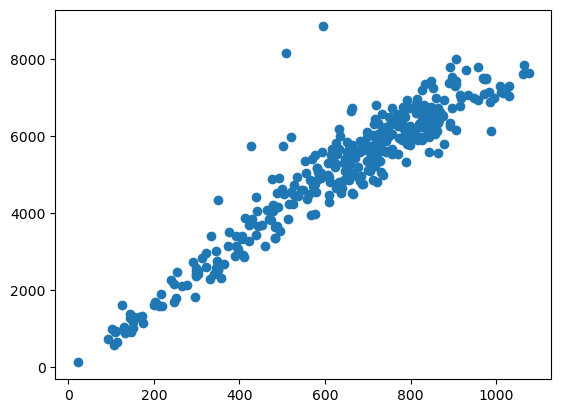

In [312]:
y= distance_join['trip_rev']
x= distance_join['trip_distance']
plt.scatter(x,y)

In [313]:
pearson_coef, p_value = stats.pearsonr(distance_join['trip_distance'], distance_join['trip_rev'])

<IPython.core.display.Javascript object>

In [314]:
pearson_coef, p_value 

(0.9431519610531853, 2.9565410624856807e-175)

In [315]:
X = distance_join['trip_distance']
y = distance_join['trip_rev']

In [316]:
model = sm.OLS(y, X).fit()

In [317]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:               trip_rev   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                          2.928e+04
Date:                Fri, 28 Mar 2025   Prob (F-statistic):                        0.00
Time:                        19:55:37   Log-Likelihood:                         -2843.5
No. Observations:                 364   AIC:                                      5689.
Df Residuals:                     363   BIC:                                      5693.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [318]:
q_trips= df[['id_driver','trips_per_hour']]

In [319]:
q_trips

,id_driver,trips_per_hour
0,6,1.802704
1,6,3.464870
2,6,NaN
3,6,1.599289
4,6,0.314465
...,...,...
21481,980,2.708804
21482,980,1.394808
21483,980,0.751095
21484,980,1.080757


In [320]:
q_grouped =  q_trips.groupby('id_driver', as_index=False)['trips_per_hour'].mean()

In [321]:
q_grouped = q_trips.sort_values(by='trips_per_hour', ascending=False).reset_index(drop=True)

,id_driver,trips_per_hour
0,6,1.903095
1,12,1.663235
2,22,1.905580
3,26,2.297025
4,31,1.702420
...,...,...
359,976,1.632537
360,977,1.771220
361,978,1.711082
362,979,1.553492


In [322]:
q_grouped =ticket_grouped

In [323]:
q_grouped

,id_driver,trips_per_hour
0,520,3.101969
1,426,2.983191
2,370,2.723889
3,134,2.713639
4,825,2.536353
...,...,...
359,288,1.292308
360,789,1.247760
361,680,1.184288
362,709,1.137553


In [324]:
q_grouped= q_grouped.dropna(subset=['trips_per_hour'])

In [325]:
q_grouped

,id_driver,trips_per_hour
0,520,3.101969
1,426,2.983191
2,370,2.723889
3,134,2.713639
4,825,2.536353
...,...,...
358,975,1.295591
359,288,1.292308
360,789,1.247760
361,680,1.184288


In [326]:
q_join= pd.merge(q_grouped, revenues_grouped, on='id_driver', how='inner')

In [327]:
q_join

,id_driver,trips_per_hour,trip_rev
0,520,3.101969,8850.49
1,426,2.983191,8170.42
2,370,2.723889,6766.16
3,134,2.713639,5750.69
4,825,2.536353,912.23
...,...,...,...
358,975,1.295591,1048.31
359,288,1.292308,4871.88
360,789,1.247760,2827.71
361,680,1.184288,1814.75


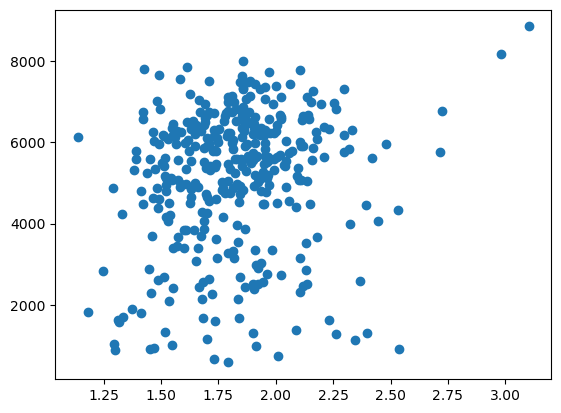

In [328]:
y= q_join['trip_rev']
x= q_join['trips_per_hour']
plt.scatter(x,y)

In [329]:
pearson_coef, p_value = stats.pearsonr(q_join['trips_per_hour'], q_join['trip_rev'])

<IPython.core.display.Javascript object>

In [330]:
pearson_coef, p_value

(0.16764344006474916, 0.0013471716709588385)

In [331]:
q_d= pd.merge(q_grouped, distance_grouped, on='id_driver', how='inner')

In [332]:
model1= pd.merge(q_d , revenues_grouped, on='id_driver', how='inner')

In [333]:
model1

,id_driver,trips_per_hour,trip_distance,trip_rev
0,520,3.101969,595.11,8850.49
1,426,2.983191,507.56,8170.42
2,370,2.723889,847.29,6766.16
3,134,2.713639,426.04,5750.69
4,825,2.536353,108.87,912.23
...,...,...,...,...
358,975,1.295591,129.01,1048.31
359,288,1.292308,712.12,4871.88
360,789,1.247760,312.72,2827.71
361,680,1.184288,295.99,1814.75


In [334]:
X = model1[['trip_distance','trips_per_hour']]
y = model1['trip_rev']

In [335]:
X = sm.add_constant(X)

In [336]:
model = sm.OLS(y, X).fit()

In [337]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               trip_rev   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     1685.
Date:                Fri, 28 Mar 2025   Prob (F-statistic):          1.76e-183
Time:                        19:55:38   Log-Likelihood:                -2793.9
No. Observations:                 363   AIC:                             5594.
Df Residuals:                     360   BIC:                             5605.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -938.5588    203.055     -4.

In [338]:
model1['log_trip_rev'] = np.log(model1['trip_rev'])
model1['log_trip_distance'] = np.log(model1['trip_distance'])
model1['log_trips_per_hour'] = np.log(model1['trips_per_hour'])

In [339]:
X = sm.add_constant(model1[['log_trip_distance', 'log_trips_per_hour']])
y = model1['log_trip_rev']

In [340]:
log_model = sm.OLS(y, X).fit()

print(log_model.summary())

                            OLS Regression Results                            
Dep. Variable:           log_trip_rev   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     3165.
Date:                Fri, 28 Mar 2025   Prob (F-statistic):          3.52e-229
Time:                        19:55:38   Log-Likelihood:                 278.49
No. Observations:                 363   AIC:                            -551.0
Df Residuals:                     360   BIC:                            -539.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.1639      0

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


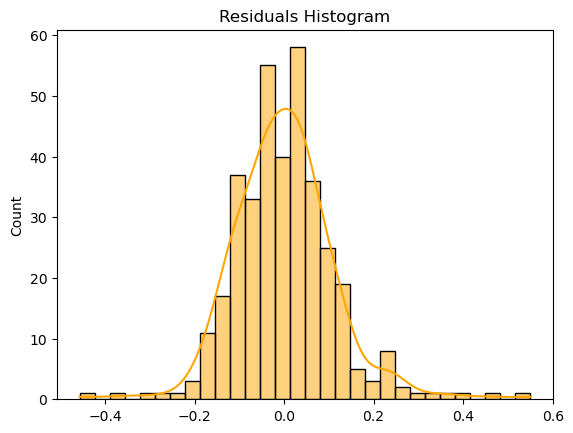

In [341]:
residuals = log_model.resid

sns.histplot(residuals, bins=30, kde=True, color="orange")
plt.title("Residuals Histogram")
plt.show()

In [380]:
drivers_grouped

,id_driver,mean_time_between_trips
0,970,00:59:10
1,61,00:47:11
2,789,00:46:20
3,672,00:43:11
4,880,00:42:32
...,...,...
358,506,00:03:38
359,924,00:03:19
360,336,00:03:12
361,703,00:03:12


In [381]:
q_join

,id_driver,trips_per_hour,trip_rev
0,520,3.101969,8850.49
1,426,2.983191,8170.42
2,370,2.723889,6766.16
3,134,2.713639,5750.69
4,825,2.536353,912.23
...,...,...,...
358,975,1.295591,1048.31
359,288,1.292308,4871.88
360,789,1.247760,2827.71
361,680,1.184288,1814.75


In [382]:
merged_df = drivers_grouped[['id_driver', 'mean_time_between_trips']].merge(
    q_join[['id_driver', 'trip_rev']], 
    on='id_driver',  
    how='inner'  
)

In [383]:
merged_df

,id_driver,mean_time_between_trips,trip_rev
0,970,00:59:10,1689.78
1,61,00:47:11,4073.71
2,789,00:46:20,2827.71
3,672,00:43:11,2616.46
4,880,00:42:32,2502.37
...,...,...,...
358,506,00:03:38,7440.60
359,924,00:03:19,4736.73
360,336,00:03:12,3876.52
361,703,00:03:12,6499.85


In [385]:
# Convert time format to timedelta
merged_df['mean_time_between_trips'] = pd.to_timedelta(merged_df['mean_time_between_trips'])


In [386]:
# Convert timedelta to seconds (numerical format)
merged_df['mean_time_between_trips'] = merged_df['mean_time_between_trips'].dt.total_seconds()

In [387]:
merged_df['mean_time_between_trips'] = merged_df['mean_time_between_trips'] / 60

In [389]:
merged_df

,id_driver,mean_time_between_trips,trip_rev
0,970,59.166667,1689.78
1,61,47.183333,4073.71
2,789,46.333333,2827.71
3,672,43.183333,2616.46
4,880,42.533333,2502.37
...,...,...,...
358,506,3.633333,7440.60
359,924,3.316667,4736.73
360,336,3.200000,3876.52
361,703,3.200000,6499.85


In [390]:
pearson_coef, p_value = stats.pearsonr(merged_df['mean_time_between_trips'], merged_df['trip_rev'])

<IPython.core.display.Javascript object>

In [392]:
pearson_coef, p_value

(-0.27695385662236055, 8.15071818750905e-08)

In [393]:
model1

,id_driver,trips_per_hour,trip_distance,trip_rev,log_trip_rev,log_trip_distance,log_trips_per_hour
0,520,3.101969,595.11,8850.49,9.088228,6.388746,1.132037
1,426,2.983191,507.56,8170.42,9.008276,6.229615,1.092994
2,370,2.723889,847.29,6766.16,8.819689,6.742043,1.002061
3,134,2.713639,426.04,5750.69,8.657075,6.054533,0.998291
4,825,2.536353,108.87,912.23,6.815892,4.690155,0.930727
...,...,...,...,...,...,...,...
358,975,1.295591,129.01,1048.31,6.954935,4.859890,0.258967
359,288,1.292308,712.12,4871.88,8.491235,6.568246,0.256430
360,789,1.247760,312.72,2827.71,7.947222,5.745308,0.221350
361,680,1.184288,295.99,1814.75,7.503703,5.690326,0.169142


In [394]:
Vemo_df = model1[['id_driver', 'trips_per_hour','trip_distance','trip_rev']].merge(
    merged_df[['id_driver', 'mean_time_between_trips']], 
    on='id_driver',  
    how='inner'  
)

In [395]:
Vemo_df

,id_driver,trips_per_hour,trip_distance,trip_rev,mean_time_between_trips
0,520,3.101969,595.11,8850.49,10.583333
1,426,2.983191,507.56,8170.42,6.950000
2,370,2.723889,847.29,6766.16,9.316667
3,134,2.713639,426.04,5750.69,13.200000
4,825,2.536353,108.87,912.23,10.666667
...,...,...,...,...,...
358,975,1.295591,129.01,1048.31,16.666667
359,288,1.292308,712.12,4871.88,9.783333
360,789,1.247760,312.72,2827.71,46.333333
361,680,1.184288,295.99,1814.75,28.100000


In [398]:
Vemo_df['log_trip_rev'] = np.log(model1['trip_rev'])
Vemo_df['log_trip_distance'] = np.log(model1['trip_distance'])
Vemo_df['log_trips_per_hour'] = np.log(model1['trips_per_hour'])
Vemo_df['log_mean_time_between_trips'] = np.log(model1['trips_per_hour'])

In [400]:
Vemo_df

,id_driver,trips_per_hour,trip_distance,trip_rev,mean_time_between_trips,log_trip_rev,log_trip_distance,log_trips_per_hour,log_mean_time_between_trips
0,520,3.101969,595.11,8850.49,10.583333,9.088228,6.388746,1.132037,1.132037
1,426,2.983191,507.56,8170.42,6.950000,9.008276,6.229615,1.092994,1.092994
2,370,2.723889,847.29,6766.16,9.316667,8.819689,6.742043,1.002061,1.002061
3,134,2.713639,426.04,5750.69,13.200000,8.657075,6.054533,0.998291,0.998291
4,825,2.536353,108.87,912.23,10.666667,6.815892,4.690155,0.930727,0.930727
...,...,...,...,...,...,...,...,...,...
358,975,1.295591,129.01,1048.31,16.666667,6.954935,4.859890,0.258967,0.258967
359,288,1.292308,712.12,4871.88,9.783333,8.491235,6.568246,0.256430,0.256430
360,789,1.247760,312.72,2827.71,46.333333,7.947222,5.745308,0.221350,0.221350
361,680,1.184288,295.99,1814.75,28.100000,7.503703,5.690326,0.169142,0.169142


In [439]:
X = sm.add_constant(Vemo_df[[ 'trips_per_hour']])
y = Vemo_df['mean_time_between_trips']

In [440]:
log_model = sm.OLS(y, X).fit()

print(log_model.summary())

                               OLS Regression Results                              
Dep. Variable:     mean_time_between_trips   R-squared:                       0.079
Model:                                 OLS   Adj. R-squared:                  0.076
Method:                      Least Squares   F-statistic:                     30.82
Date:                     Fri, 28 Mar 2025   Prob (F-statistic):           5.50e-08
Time:                             20:38:51   Log-Likelihood:                -1250.5
No. Observations:                      363   AIC:                             2505.
Df Residuals:                          361   BIC:                             2513.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [441]:
avg_ticket= df[['id_driver','trip_rev']]

In [442]:
avg_ticket

,id_driver,trip_rev
0,6,70.35
1,6,80.97
2,6,38.11
3,6,99.43
4,6,640.89
...,...,...
21481,980,51.26
21482,980,122.71
21483,980,104.91
21484,980,127.55


In [444]:
ticket_grouped =  avg_ticket.groupby('id_driver', as_index=False)['trip_rev'].mean()

In [445]:
ticket_grouped

,id_driver,trip_rev
0,6,107.070517
1,12,98.049000
2,22,83.552712
3,26,71.037778
4,31,108.905893
...,...,...
359,976,107.975778
360,977,106.665385
361,978,105.928800
362,979,114.923810


In [447]:
ticket_grouped = ticket_grouped.sort_values(by='trip_rev', ascending=False).reset_index(drop=True)

In [448]:
ticket_grouped

,id_driver,trip_rev
0,709,165.643784
1,953,160.638696
2,267,142.059375
3,903,139.283571
4,354,134.608800
...,...,...
359,568,68.795556
360,566,67.088202
361,825,65.159286
362,830,62.562615


In [450]:
Vemo_df1 = Vemo_df[['id_driver', 'trips_per_hour','trip_distance','trip_rev','mean_time_between_trips']].merge(
    ticket_grouped[['id_driver', 'trip_rev']], 
    on='id_driver',  
    how='inner'  
)

In [452]:
Vemo_df1

,id_driver,trips_per_hour,trip_distance,trip_rev_x,mean_time_between_trips,trip_rev_y
0,520,3.101969,595.11,8850.49,10.583333,76.960783
1,426,2.983191,507.56,8170.42,6.950000,79.324466
2,370,2.723889,847.29,6766.16,9.316667,107.399365
3,134,2.713639,426.04,5750.69,13.200000,71.883625
4,825,2.536353,108.87,912.23,10.666667,65.159286
...,...,...,...,...,...,...
358,975,1.295591,129.01,1048.31,16.666667,116.478889
359,288,1.292308,712.12,4871.88,9.783333,99.426122
360,789,1.247760,312.72,2827.71,46.333333,88.365938
361,680,1.184288,295.99,1814.75,28.100000,113.421875


In [453]:
Vemo_df1 = Vemo_df1.rename(columns={'trip_rev_y': 'avg_ticket'})

In [457]:
Vemo_df1

,id_driver,trips_per_hour,trip_distance,trip_rev_x,mean_time_between_trips,avg_ticket,log_trip_rev,log_trip_distance,log_trips_per_hour,log_mean_time_between_trips
0,520,3.101969,595.11,8850.49,10.583333,76.960783,9.088228,6.388746,1.132037,1.132037
1,426,2.983191,507.56,8170.42,6.950000,79.324466,9.008276,6.229615,1.092994,1.092994
2,370,2.723889,847.29,6766.16,9.316667,107.399365,8.819689,6.742043,1.002061,1.002061
3,134,2.713639,426.04,5750.69,13.200000,71.883625,8.657075,6.054533,0.998291,0.998291
4,825,2.536353,108.87,912.23,10.666667,65.159286,6.815892,4.690155,0.930727,0.930727
...,...,...,...,...,...,...,...,...,...,...
358,975,1.295591,129.01,1048.31,16.666667,116.478889,6.954935,4.859890,0.258967,0.258967
359,288,1.292308,712.12,4871.88,9.783333,99.426122,8.491235,6.568246,0.256430,0.256430
360,789,1.247760,312.72,2827.71,46.333333,88.365938,7.947222,5.745308,0.221350,0.221350
361,680,1.184288,295.99,1814.75,28.100000,113.421875,7.503703,5.690326,0.169142,0.169142


In [466]:
Vemo_df1['log_trip_rev'] = np.log(Vemo_df1['trip_rev_x'])
Vemo_df1['log_trip_distance'] = np.log(Vemo_df1['trip_distance'])
Vemo_df1['log_trips_per_hour'] = np.log(Vemo_df1['trips_per_hour'])
Vemo_df1['log_mean_time_between_trips'] = np.log(Vemo_df1['trips_per_hour'])
Vemo_df1['log_avg_ticket'] = np.log(Vemo_df1['avg_ticket'])

In [467]:
X = sm.add_constant(Vemo_df1[[ 'log_trips_per_hour','log_trip_distance','log_avg_ticket']])
y = Vemo_df1['log_trip_rev']

In [469]:
log_model = sm.OLS(y, X).fit()

print(log_model.summary())

                            OLS Regression Results                            
Dep. Variable:           log_trip_rev   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     2130.
Date:                Fri, 28 Mar 2025   Prob (F-statistic):          2.91e-228
Time:                        21:12:02   Log-Likelihood:                 280.55
No. Observations:                 363   AIC:                            -553.1
Df Residuals:                     359   BIC:                            -537.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.7104      0